In [3]:
import pandas as pd

# Read the CSV file
file_path = 'gdb9_G4MP2_withdata_hydrogenation.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand what's in the data
print(data.head())


   Unnamed: 0 unsat_SMILE sat_SMILE  unsat_enthalpy  sat_enthalpy  nH2    pH2  \
0           0         C#C        CC      -77.208448    -79.657478    2  13.42   
1           1         C=O        CO     -114.367776   -115.566787    1   6.29   
2           2        CC#C       CCC     -116.454870   -118.895579    2   9.15   
3           3        CC=O       CCO     -153.618376   -154.809561    1   4.38   
4           4     CC(C)=O    CC(C)O     -192.867362   -194.054239    1   3.36   

      delta_H  
0  150.735206  
1   83.774454  
2  139.811813  
3   63.227291  
4   51.916637  


In [5]:
import pandas as pd

# Read the CSV file
file_path = 'gdb9_G4MP2_withdata_hydrogenation.csv'
data = pd.read_csv(file_path)

# Select only the columns you care about
selected_columns = ['unsat_SMILE', 'sat_SMILE', 'delta_H', 'nH2', 'pH2']
clean_data = data[selected_columns]

# Save the new DataFrame to a new CSV file
clean_file_path = 'gdb9_G4MP2_withdata_hydrogenation_clean.csv'
clean_data.to_csv(clean_file_path, index=False)

print(f"The cleaned data has been saved to {clean_file_path}")


The cleaned data has been saved to gdb9_G4MP2_withdata_hydrogenation_clean.csv


Mean Absolute Error on Test Set: 39.48406034455206


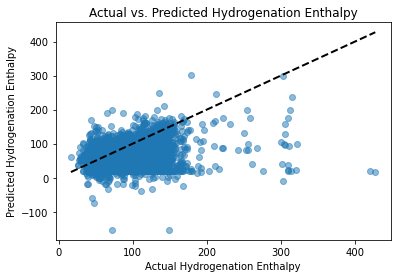

In [7]:
# Linear Regression

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


# Combine the unsaturated and saturated SMILES strings
SMILES = clean_data['unsat_SMILE'] + clean_data['sat_SMILE']

# Vectorize the SMILES strings using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(SMILES)

# Target variable is the hydrogenation enthalpy
y = clean_data['delta_H']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mae}')


# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Hydrogenation Enthalpy')
plt.ylabel('Predicted Hydrogenation Enthalpy')
plt.title('Actual vs. Predicted Hydrogenation Enthalpy')
plt.show()

